In [9]:
df = pd.read_csv("2020_Real_Estate_Transaction_Data.csv")
df.head()

,transaction date,district,transaction type,land shifting total area,num_building,num_land,num_garage,total floor number,building state,main building materials,...,management org,carpark type,carpark shifting area,carpark total price,main building area,subsidiary building area,balcony area,elevator,total ntd,unit ntd
0,1/2/2020,Beitou District,Land+Building+Garage,21.16,2,2,1,7.0,Apartment_5to10storey,Reinforced Concrete,...,1,Ramp Plane,0.0,0,95.88,0.00,7.94,1,10000000,85587.0
1,1/2/2020,Datong District,Land+Building,12.00,1,1,0,2.0,House,NaN,...,0,No carpark,0.0,0,17.46,0.00,0.00,0,2553800,146266.0
2,1/2/2020,Wenshan District,Land+Building+Garage,35.61,1,1,1,14.0,Apartment_11storeyorgreater,Reinforced Concrete,...,1,Ramp Plane,0.0,0,96.26,0.00,11.11,1,24500000,135975.0
3,1/2/2020,Zhongshan District,Land+Building,9.50,1,1,0,4.0,Apartment_5storey,Strengthened Brickwork,...,0,No carpark,0.0,0,20.01,3.36,0.00,0,2300000,98375.0
4,1/2/2020,Xinyi District,Land+Building,1.80,1,1,0,7.0,Apartment_5to10storey,Reinforced Concrete,...,0,No carpark,0.0,0,5.98,0.10,0.56,1,2200000,139505.0


In [126]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
matplotlib.rcParams["figure.figsize"] = (20,10)

In [69]:
df2 = df.drop(['transaction date',
       'land shifting total area',
        'building state', 'main building materials',
       'complete year', 'compartment', 'management org',
       'carpark shifting area', 'carpark total price',
       'subsidiary building area', 'balcony area', 'elevator', 'carpark type', 'elevator'],axis='columns')
df2.shape

(22740, 12)

In [70]:
df.shape
df.columns

Index(['transaction date', 'district', 'transaction type',
       'land shifting total area', 'num_building', 'num_land', 'num_garage',
       'total floor number', 'building state', 'main building materials',
       'complete year', 'building shifting total area', 'num_room',
       'num_bathroom', 'compartment', 'management org', 'carpark type',
       'carpark shifting area', 'carpark total price', 'main building area',
       'subsidiary building area', 'balcony area', 'elevator', 'total ntd',
       'unit ntd'],
      dtype='object')

In [71]:
df2.columns

Index(['district', 'transaction type', 'num_building', 'num_land',
       'num_garage', 'total floor number', 'building shifting total area',
       'num_room', 'num_bathroom', 'main building area', 'total ntd',
       'unit ntd'],
      dtype='object')

In [72]:
df3 = df2.dropna()

In [73]:
df3.isnull().sum()

district                        0
transaction type                0
num_building                    0
num_land                        0
num_garage                      0
total floor number              0
building shifting total area    0
num_room                        0
num_bathroom                    0
main building area              0
total ntd                       0
unit ntd                        0
dtype: int64

In [74]:
df3.num_room.unique()

array([ 3,  0,  1,  2,  4,  5,  6,  9, 10, 12,  7,  8, 11, 20, 13, 15, 14,
       35, 16, 24, 18, 17], dtype=int64)

In [75]:
df3.head()

,district,transaction type,num_building,num_land,num_garage,total floor number,building shifting total area,num_room,num_bathroom,main building area,total ntd,unit ntd
0,Beitou District,Land+Building+Garage,2,2,1,7.0,116.84,3,2,95.88,10000000,85587.0
1,Datong District,Land+Building,1,1,0,2.0,17.46,0,0,17.46,2553800,146266.0
2,Wenshan District,Land+Building+Garage,1,1,1,14.0,180.18,3,2,96.26,24500000,135975.0
3,Zhongshan District,Land+Building,1,1,0,4.0,23.38,1,1,20.01,2300000,98375.0
4,Xinyi District,Land+Building,1,1,0,7.0,15.77,2,1,5.98,2200000,139505.0


In [76]:
df4= df3.copy()

In [77]:
df4['price_per_sqft'] = df4['unit ntd'] / df4['building shifting total area']

In [78]:
df4.head()

,district,transaction type,num_building,num_land,num_garage,total floor number,building shifting total area,num_room,num_bathroom,main building area,total ntd,unit ntd,price_per_sqft
0,Beitou District,Land+Building+Garage,2,2,1,7.0,116.84,3,2,95.88,10000000,85587.0,732.514550
1,Datong District,Land+Building,1,1,0,2.0,17.46,0,0,17.46,2553800,146266.0,8377.205040
2,Wenshan District,Land+Building+Garage,1,1,1,14.0,180.18,3,2,96.26,24500000,135975.0,754.662005
3,Zhongshan District,Land+Building,1,1,0,4.0,23.38,1,1,20.01,2300000,98375.0,4207.656116
4,Xinyi District,Land+Building,1,1,0,7.0,15.77,2,1,5.98,2200000,139505.0,8846.227013


In [79]:
df4.district = df4.district.apply(lambda x: x.strip())
district_stats = df4['district'].value_counts(ascending=False)
district_stats

Zhongshan District     3161
Neihu District         2750
Wenshan District       2160
Beitou District        2031
Daan District          1921
Shilin District        1682
Xinyi District         1553
Wanhua District        1492
Songshan District      1441
ZhongZheng District    1296
Datong District        1009
Nangang District        965
Name: district, dtype: int64

In [80]:
# Removing Outliers if price extremely high for area
def remove_pps_outliers(tem):
    df_out = pd.DataFrame()
    for key, subdf in tem.groupby('district'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df4)
df6.shape

(19946, 13)

In [81]:
df6.head(10)

,district,transaction type,num_building,num_land,num_garage,total floor number,building shifting total area,num_room,num_bathroom,main building area,total ntd,unit ntd,price_per_sqft
0,Beitou District,Land+Building+Garage,2,2,1,7.0,116.84,3,2,95.88,10000000,85587.0,732.514550
1,Beitou District,Land+Building+Garage,1,1,1,9.0,182.36,4,2,92.15,20700000,113512.0,622.461066
2,Beitou District,Land+Building,1,1,0,5.0,102.52,3,1,80.29,14500000,141436.0,1379.594226
3,Beitou District,Land+Building,1,4,0,7.0,50.34,1,1,35.44,3500000,69527.0,1381.148192
4,Beitou District,Land+Building,1,3,0,4.0,65.25,2,1,57.15,8100000,124138.0,1902.498084
5,Beitou District,Land+Building,1,1,0,4.0,151.83,3,2,151.83,18000000,118554.0,780.833827
6,Beitou District,Land+Building+Garage,1,1,1,14.0,150.44,4,2,73.41,22200000,147567.0,980.902685
7,Beitou District,Land+Building,1,2,0,7.0,50.05,1,1,39.34,4180000,83516.0,1668.651349
8,Beitou District,Land+Building,1,1,0,5.0,104.38,3,2,86.29,12000000,114965.0,1101.408316
9,Beitou District,Land+Building+Garage,2,1,1,12.0,187.84,3,3,99.53,20980000,111691.0,594.607112


Text(0, 0.5, 'Count')

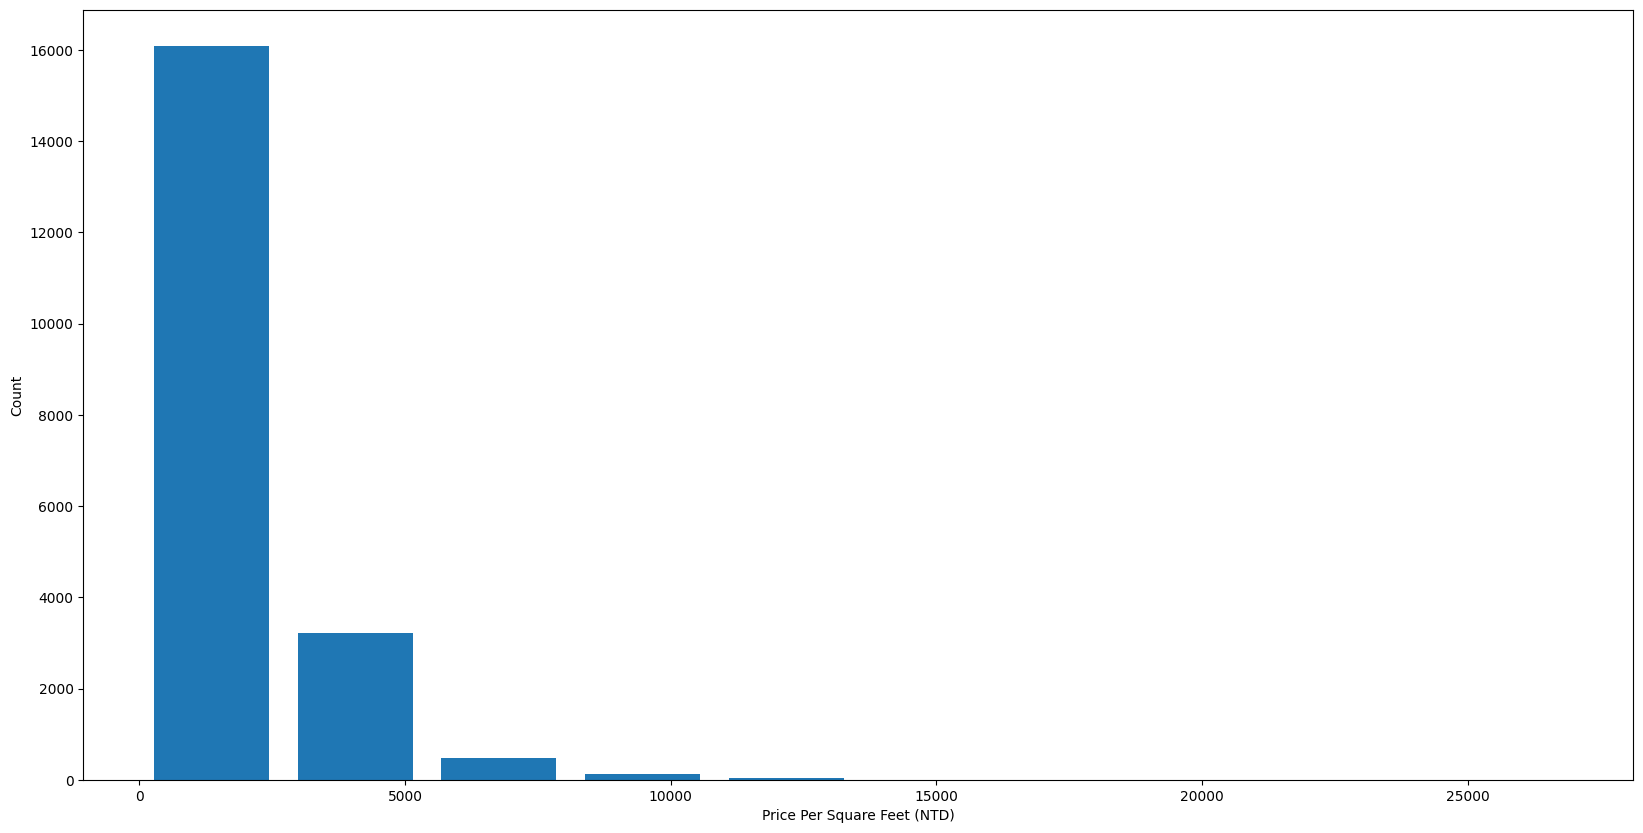

In [82]:
mp.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet (NTD)")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

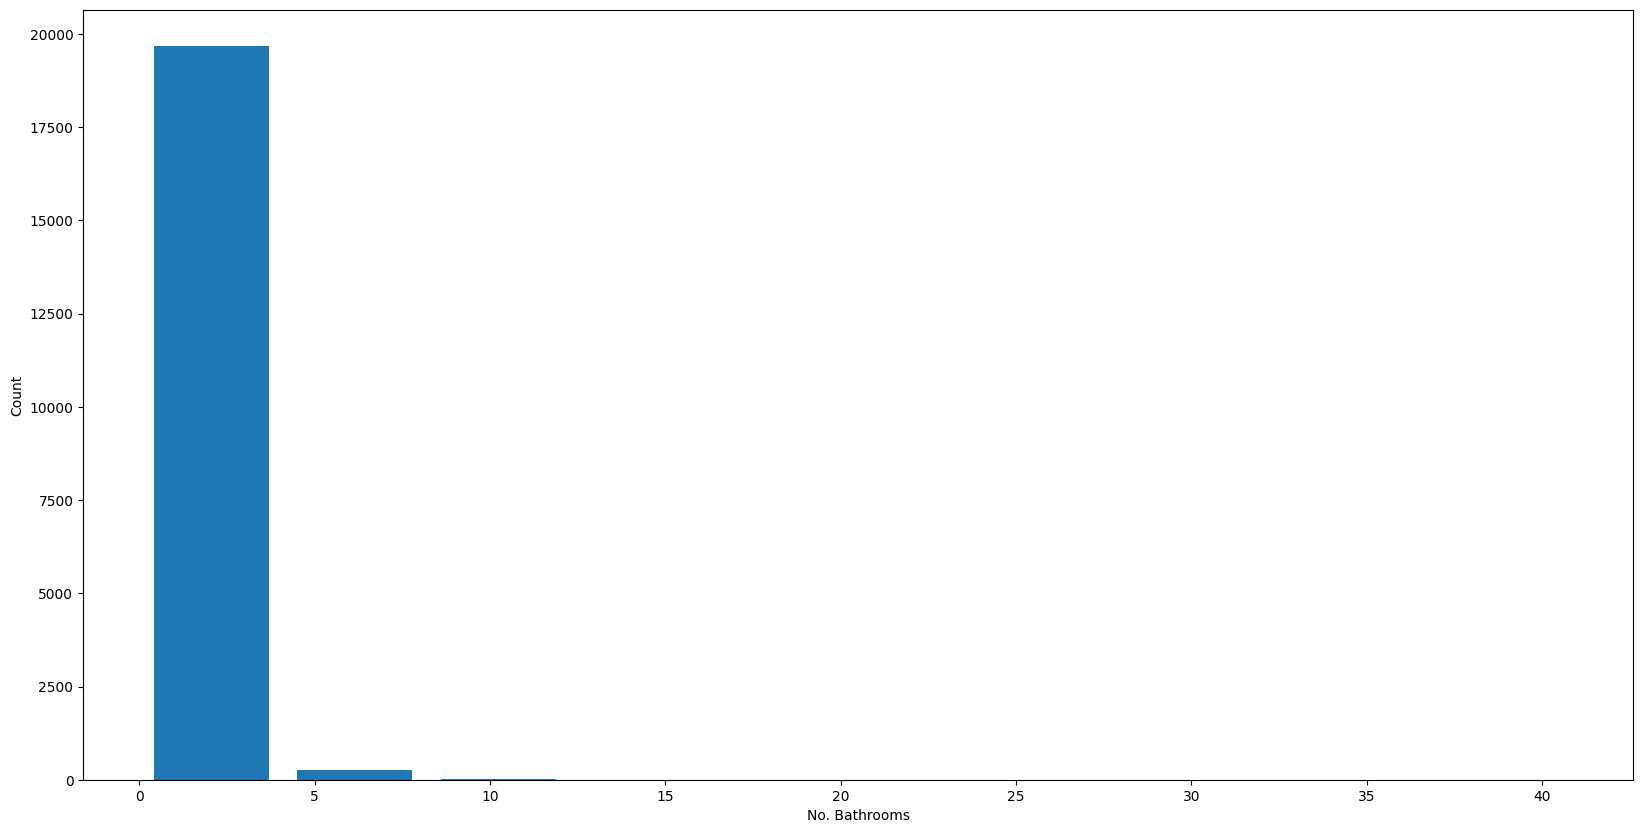

In [83]:
plt.hist(df6.num_bathroom,rwidth=0.8)
plt.xlabel("No. Bathrooms")
plt.ylabel("Count")

In [87]:
df6[df6.num_bathroom>df6.num_room+2]

,district,transaction type,num_building,num_land,num_garage,total floor number,building shifting total area,num_room,num_bathroom,main building area,total ntd,unit ntd,price_per_sqft
688,Beitou District,Land+Building+Garage,1,2,2,21.0,313.96,0,3,124.06,68600000,279933.0,891.619952
1066,Beitou District,Land+Building+Garage,1,1,2,8.0,390.89,1,4,171.81,66000000,205656.0,526.122439
1071,Beitou District,Land+Building+Garage,1,2,3,21.0,398.55,0,4,149.21,91300000,307040.0,770.392673
1300,Beitou District,Land+Building+Garage,1,2,2,21.0,358.44,0,3,143.90,93360000,316084.0,881.832385
1301,Beitou District,Land+Building+Garage,1,2,2,21.0,355.00,0,4,149.17,91530000,316112.0,890.456338
1302,Beitou District,Land+Building+Garage,1,2,3,21.0,398.95,0,4,149.21,89070000,297350.0,745.331495
1346,Beitou District,Land+Building+Garage,1,2,3,21.0,401.99,0,3,143.94,94900000,311625.0,775.205851
1416,Beitou District,Land+Building+Garage,1,2,1,21.0,314.49,0,3,144.64,89020000,318606.0,1013.087857
1654,Beitou District,Land+Building+Garage,1,2,2,21.0,312.75,0,3,122.81,66140000,269202.0,860.757794
1655,Beitou District,Land+Building+Garage,1,2,3,21.0,401.99,0,3,141.63,96390000,321723.0,800.325879


In [85]:
df6[df6.num_bathroom>df6.num_room+2]
df6.shape

(19946, 13)

In [88]:
df7 = df6[~(df6.num_bathroom>df6.num_room+2)]
df7.shape

(19911, 13)

In [91]:
df7.columns

Index(['district', 'transaction type', 'num_building', 'num_land',
       'num_garage', 'total floor number', 'building shifting total area',
       'num_room', 'num_bathroom', 'main building area', 'total ntd',
       'unit ntd', 'price_per_sqft'],
      dtype='object')

In [92]:
df8 = df7.drop(['price_per_sqft'],axis='columns')

In [93]:
dummies = pd.get_dummies(df8.district)
dummies.head(3)

,Beitou District,Daan District,Datong District,Nangang District,Neihu District,Shilin District,Songshan District,Wanhua District,Wenshan District,Xinyi District,ZhongZheng District,Zhongshan District
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0


In [245]:
df9 = pd.concat([df8,dummies.drop('Zhongshan District',axis='columns')],axis='columns')
df9.head()

,district,transaction type,num_building,num_land,num_garage,total floor number,building shifting total area,num_room,num_bathroom,main building area,...,Daan District,Datong District,Nangang District,Neihu District,Shilin District,Songshan District,Wanhua District,Wenshan District,Xinyi District,ZhongZheng District
0,Beitou District,Land+Building+Garage,2,2,1,7.0,116.84,3,2,95.88,...,0,0,0,0,0,0,0,0,0,0
1,Beitou District,Land+Building+Garage,1,1,1,9.0,182.36,4,2,92.15,...,0,0,0,0,0,0,0,0,0,0
2,Beitou District,Land+Building,1,1,0,5.0,102.52,3,1,80.29,...,0,0,0,0,0,0,0,0,0,0
3,Beitou District,Land+Building,1,4,0,7.0,50.34,1,1,35.44,...,0,0,0,0,0,0,0,0,0,0
4,Beitou District,Land+Building,1,3,0,4.0,65.25,2,1,57.15,...,0,0,0,0,0,0,0,0,0,0


In [241]:
df10 = df9.drop(['district','transaction type'],axis='columns')
df10.head(2)

,num_building,num_land,num_garage,total floor number,building shifting total area,num_room,num_bathroom,main building area,total ntd,unit ntd,...,Daan District,Datong District,Nangang District,Neihu District,Shilin District,Songshan District,Wanhua District,Wenshan District,Xinyi District,ZhongZheng District
0,2,2,1,7.0,116.84,3,2,95.88,10000000,85587.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,9.0,182.36,4,2,92.15,20700000,113512.0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
X = df10.drop(['total ntd'],axis='columns')
X.head(3)

,num_building,num_land,num_garage,total floor number,building shifting total area,num_room,num_bathroom,main building area,unit ntd,Beitou District,Daan District,Datong District,Nangang District,Neihu District,Shilin District,Songshan District,Wanhua District,Wenshan District,Xinyi District,ZhongZheng District
0,2,2,1,7.0,116.84,3,2,95.88,85587.0,1,0,0,0,0,0,0,0,0,0,0
1,1,1,1,9.0,182.36,4,2,92.15,113512.0,1,0,0,0,0,0,0,0,0,0,0
2,1,1,0,5.0,102.52,3,1,80.29,141436.0,1,0,0,0,0,0,0,0,0,0,0


In [101]:
X.shape

(19911, 20)

In [141]:
y = df10['total ntd']
y.head(3)

0    10000000
1    20700000
2    14500000
Name: total ntd, dtype: int64

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)


In [343]:
lr_clf = LinearRegression()
lr_clf.fit(X_train.values,y_train.values)
lr_clf.score(X_test.values,y_test.values)

0.7827868640025372

In [348]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X.values, y.values, cv=cv)

array([0.80011271, 0.72112012, 0.72803716, 0.67194608, 0.79593719])

In [349]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'copy_X': [True, False],
                'n_jobs': [None],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['poisson', 'absolute_error', 'friedman_mse', 'squared_error'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X.values,y.values)

,model,best_score,best_params
0,linear_regression,0.749464,"{'copy_X': True, 'fit_intercept': True, 'n_job..."
1,lasso,0.743431,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.843746,"{'criterion': 'absolute_error', 'splitter': 'r..."


In [350]:
X.columns

Index(['num_building', 'num_land', 'num_garage', 'total floor number',
       'building shifting total area', 'num_room', 'num_bathroom',
       'main building area', 'unit ntd', 'Beitou District', 'Daan District',
       'Datong District', 'Nangang District', 'Neihu District',
       'Shilin District', 'Songshan District', 'Wanhua District',
       'Wenshan District', 'Xinyi District', 'ZhongZheng District'],
      dtype='object')

In [368]:
def predict_price(location,sqft,room,bath):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[4] = sqft
    x[5] = room
    x[6] = bath
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [369]:
predict_price('Songshan District',3000, 2, 2)

139232443.90883735

In [353]:
import pickle
with open('taiwan_realestate_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [355]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))